**IMPORT STATEMENTS**

In [1]:
# Add import statements here

import re 
import nltk
import json
import string
import requests
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
from nltk.collocations import *
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from sklearn.feature_extraction.text import CountVectorizer

**EDA OF AT&T**

In [2]:
# loading our att training dataset

att_train = pd.read_csv("att.csv")
att_train.head()

,Date,Reviewer,Content,Rating
0,2020-12-29,Mary of Dallas,Absolutely the worse customer service I have e...,1.0
1,2020-12-28,kor of Derwood,Don't use AT&T. I switched from T-Mobile to AT...,1.0
2,2020-12-28,Mike of Edison,The worst wireless company ever from the servi...,1.0
3,2020-12-28,Heather of Framingham,We have a family plan with 4 cell phones (iPho...,1.0
4,2020-12-23,Sylvia of Mobile,AT&T is a scam of the highest magnitude. I tur...,1.0


In [3]:
# checking the information about the dataset

att_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4587 entries, 0 to 4586
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4587 non-null   object 
 1   Reviewer  4587 non-null   object 
 2   Content   4587 non-null   object 
 3   Rating    4587 non-null   float64
dtypes: float64(1), object(3)
memory usage: 143.5+ KB


In [4]:
# since date is in object type, we shall convert it into datetime stamp

att_train['Date'] = pd.to_datetime(att_train['Date'], errors = 'coerce')

In [5]:
# rechecking the information about variable

att_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4587 entries, 0 to 4586
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4587 non-null   datetime64[ns]
 1   Reviewer  4587 non-null   object        
 2   Content   4587 non-null   object        
 3   Rating    4587 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 143.5+ KB


*The dataset consists of 4587 rows and 4 columns, namely Date, Reviewer, Content, Rating*

**Average Rating**

In [6]:
# describing the Rating column

att_train.describe()

,Rating
count,4587.000000
mean,1.435579
std,1.060913
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


*The data consists of total 4587 ratings. The avearge rating received by AT&T is 1.435579. The minimum rating is 0 which denotes that few reviewers have not rated AT&T and the maximum rating is 5.*

**Count of each Rating**

In [7]:
# Checking the count of each rating

att_train.Rating.value_counts()

1.0    3752
3.0     216
4.0     203
2.0     199
5.0     195
0.0      22
Name: Rating, dtype: int64

**Bifurcation of Ratings**

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='count'>

Text(0.5, 1.0, 'Total Review Numbers for Each Rating')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Number of Reviews')

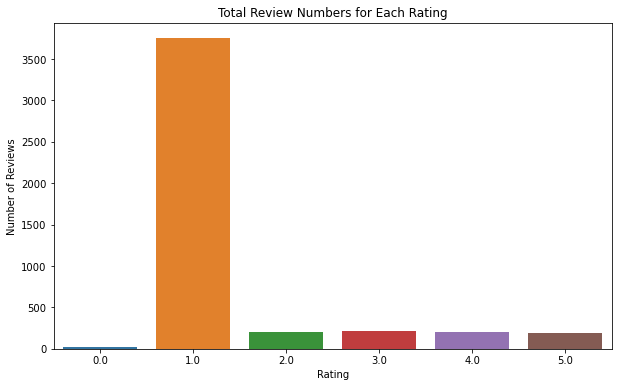

1.0    3752
3.0     216
4.0     203
2.0     199
5.0     195
0.0      22
Name: Rating, dtype: int64

In [8]:
# bifurcation of ratings
plt.figure(figsize = (10,6))
sns.countplot(data = att_train, x = 'Rating')
plt.title('Total Review Numbers for Each Rating', color='black')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
att_train['Rating'].value_counts()

*As we can see from the above table, 3752 has rated AT&T as 1, 199 has rated as 2, 216 has rated as 3, 203 has rated as 4, 195 has rated as 5, and 22 reviwers did not given any ratings*

<Figure size 720x432 with 0 Axes>

Rating
0.0      22
1.0    3752
2.0     199
3.0     216
4.0     203
5.0     195
Name: Rating, dtype: int64

<AxesSubplot:ylabel='Rating'>

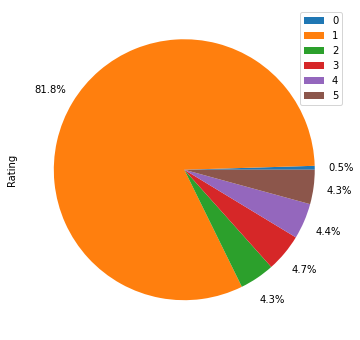

In [9]:
# bifuraction of rating as percentage

plt.figure(figsize = (10,6))
att_train.groupby('Rating').Rating.count()
att_train.groupby('Rating').Rating.count().plot(kind='pie',autopct='%1.1f%%', pctdistance=1.2, labeldistance=0.5, labels=['','','','','',''])
plt.legend(loc=1, labels=att_train.index)
plt.show()

*From the above chart we can see that 81.8% have rated AT&T as 1, 4.3% have rated it as 2, 4.7% have rated it as 3, 4.4% have rated it as 2, 4.3% have rated it as 5, and 0.5% did not give any ratings.*

**Year wise Rating Distribution**

In [10]:
# rating received by AT&T on a yearly basis

year_att_train = pd.DataFrame(att_train.groupby([att_train.Date.dt.year]).Rating.value_counts())
year_att_train

Rating
Date Rating        
2015 1.0        996
     2.0         45
     5.0         16
     0.0          5
     3.0          4
     4.0          4
2016 1.0        729
     5.0         18
     4.0         15
     2.0         13
     3.0         13
     0.0          6
2017 1.0        611
     3.0        115
     4.0        104
     5.0         83
     2.0         71
     0.0          5
2018 1.0        614
     4.0         53
     3.0         50
     2.0         35
     5.0         32
     0.0          3
2019 1.0        593
     2.0         19
     5.0         11
     3.0          9
     4.0          4
     0.0          1
2020 1.0        209
     5.0         35
     3.0         25
     4.0         23
     2.0         16
     0.0          2

*From the above table we can see the detailed bifurcation of rating in each year.*  
*In **2015**, 996 reviwers rated it as 1, 45 rated it as 2, 4 reviewers rated it as 3, 4 reviwers rated it as 4, 16 reviewers rated it as 5, and 5 did not gave any ratings.*  
*In **2016**, 729 reviwers rated it as 1, 13 rated it as 2, 13 reviewers rated it as 3, 15 reviwers rated it as 4, 18 reviewers rated it as 5, and 6 did not gave any ratings.*  
*In **2017**, 611 reviwers rated it as 1, 71 rated it as 2, 115 reviewers rated it as 3, 104 reviwers rated it as 4, 83 reviewers rated it as 5, and 5 did not gave any ratings.*  
*In **2018**, 614 reviwers rated it as 1, 35 rated it as 2, 50 reviewers rated it as 3, 53 reviwers rated it as 4, 32 reviewers rated it as 5, and 3 did not gave any ratings.*  
*In **2019**, 593 reviwers rated it as 1, 19 rated it as 2, 9 reviewers rated it as 3, 4 reviwers rated it as 4, 11 reviewers rated it as 5, and 1 did not gave any ratings.*  
*In **2020**, 209 reviwers rated it as 1, 16 rated it as 2, 25 reviewers rated it as 3, 23 reviwers rated it as 4, 35 reviewers rated it as 5, and 2 did not gave any ratings.*

**Calculating Length of Reviews on the Basis of Ratings**

In [11]:
# now we shall see the word count to calculate the length of each review on the basis of rating

word_count=[]
for word in att_train.Content:
    word_count.append(len(str(word).split()))

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='Rating'>

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Review Length')

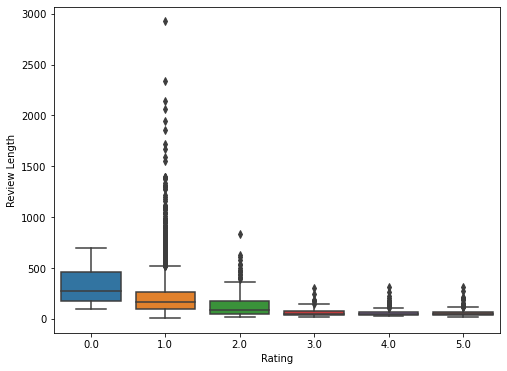

In [12]:
# calculating the length of review on the basis of rating

plt.figure(figsize = (8,6))
sns.boxplot(x='Rating',y=word_count,data=att_train)
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

*The above bar graph shows that there are outliers present. Hence, to better understand the review length we will plot the graph without outliers*

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='Rating'>

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Review Length')

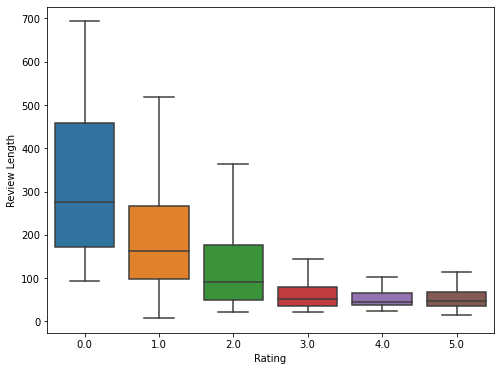

In [13]:
# since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers

plt.figure(figsize = (8,6))
sns.boxplot(x='Rating', y=word_count, data=att_train, showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

*As we can see from the above graph, for AT&T the largest review is written by reviewers who did not give any ratings consisting of length from approximately 170 to 450 word count, then the reviewers who rated AT&T as 1, have written the second largest reviews length wise and the review length ranges from 100 to approximately 270 word counts. The reviewers who have given rating 4 has written the shortest reviews.*

**Normalization, Tokenization, Collocation**

In [14]:
# define the function
def top_collocation(docs, K):
    
    # creating a list for result consisiting of phrases
    result = []
    
    # creating a list to append tokens
    token_list = []
    
    # tokenize each row
    doc = docs.apply(nltk.word_tokenize)
    for tokens in doc:
        for token in tokens:
            token_list.append(token)
    #print(tokenlist)
    
    # intialising lemmatization for normalization purpose
    lemmatizer = WordNetLemmatizer()
    
    # creating a list to append lematize tokens
    lemmatize_token = []
    
    # lemmatize each token in a row
    for token in token_list:
        lem_tok = lemmatizer.lemmatize(token)
        lemmatize_token.append(lem_tok)
    
    # stopwords and punctuations
    stop_words = stopwords.words('english')
    stop_words+=["AT&T", "T-Mobile", "new", "month", "next", 'I', 'AT', '&', 'T', "cell", "phone", "she", "they", "get", "could", "", "wa", "ha", "first", "last"]
    punctuations = string.punctuation+'—'+'’'+'”'+'“'+"''"
    
    # removing stopwords and punctuations
    tokens = [ token.lower() for token in lemmatize_token if token not in stop_words and token not in punctuations]
    
    # removing the empty space
    tokens = [token.strip() for token in tokens if token.strip()!='']
    
    # providing part of speech tagging to tokens
    tagged_tokens= nltk.pos_tag(tokens)
    
    # creating bigrams
    bigrams=list(nltk.bigrams(tagged_tokens))
    
    # creating word distribution frequency of bigrams
    word_dist=nltk.FreqDist(bigrams)
    
    # phrases of JJ-NN(adjective noun) and NN-NN(noun noun) combination
    phrases=[(x[0],y[0]) for (x,y) in bigrams if x[1].startswith('JJ') or x[1].startswith('NN') and y[1].startswith('NN')]
    
    # creating word distribution frequency of phrases
    phrases_dist=nltk.FreqDist(phrases)
    
    # most common phrases
    result = phrases_dist.most_common(K)
    
    # returns the most frequent collocation
    return result

In [15]:
# checking top 100 collocation

top_collocation(att_train['Content'],100)

[(('customer', 'service'), 2432),
 (('internet', 'service'), 256),
 (('data', 'plan'), 178),
 (('billing', 'cycle'), 168),
 (('cancel', 'service'), 166),
 (('several', 'time'), 165),
 (('termination', 'fee'), 164),
 (('pay', 'bill'), 159),
 (('unlimited', 'data'), 155),
 (('service', 'rep'), 146),
 (('loyal', 'customer'), 143),
 (('call', 'customer'), 139),
 (('customer', 'care'), 136),
 (('monthly', 'bill'), 131),
 (('early', 'termination'), 129),
 (('many', 'time'), 122),
 (('final', 'bill'), 122),
 (('credit', 'card'), 119),
 (('wireless', 'service'), 111),
 (('gift', 'card'), 111),
 (('sim', 'card'), 111),
 (('multiple', 'time'), 108),
 (('sale', 'rep'), 106),
 (('long', 'time'), 105),
 (('many', 'year'), 98),
 (('year', 'contract'), 97),
 (('speak', 'supervisor'), 94),
 (('local', 'store'), 93),
 (('text', 'message'), 93),
 (('credit', 'account'), 92),
 (('late', 'fee'), 90),
 (('activation', 'fee'), 88),
 (('family', 'plan'), 87),
 (('worst', 'customer'), 87),
 (('worst', 'compan

*The top 100 collocations shows us the different aspects side of AT&T*

**Naive Based Sentiment Analysis**

In [16]:
# adding a column tokenized_row in the att_train dataframe which contains list of tokens

att_train['tokenized_row'] = att_train['Content'].apply(nltk.word_tokenize)

In [17]:
# rechecking att_train['tokenized_row'] is added in the dataframe

att_train.head()

,Date,Reviewer,Content,Rating,tokenized_row
0,2020-12-29,Mary of Dallas,Absolutely the worse customer service I have e...,1.0,"[Absolutely, the, worse, customer, service, I,..."
1,2020-12-28,kor of Derwood,Don't use AT&T. I switched from T-Mobile to AT...,1.0,"[Do, n't, use, AT, &, T, ., I, switched, from,..."
2,2020-12-28,Mike of Edison,The worst wireless company ever from the servi...,1.0,"[The, worst, wireless, company, ever, from, th..."
3,2020-12-28,Heather of Framingham,We have a family plan with 4 cell phones (iPho...,1.0,"[We, have, a, family, plan, with, 4, cell, pho..."
4,2020-12-23,Sylvia of Mobile,AT&T is a scam of the highest magnitude. I tur...,1.0,"[AT, &, T, is, a, scam, of, the, highest, magn..."


In [18]:
# finding the positive words for each review

with open("positive-words.txt",'r') as f:
    positive_words=[line.strip() for line in f]

negations=['not', 'too', 'n\'t', 'no', 'cannot', 'neither','nor', 'little', 'few']

positive_token_list = []

for token in att_train['tokenized_row']:
    positive_tokens=[]
    for idx, tok in enumerate(token):
        if tok in positive_words:
            if idx > 0:
                if token[idx-1] not in negations:
                    positive_tokens.append(tok)
            else:
                positive_tokens.append(tok)
    positive_token_list.append(positive_tokens)
    
print(positive_token_list)

[['fast', 'better'], ['free', 'free'], ['refund', 'won', 'best'], ['satisfied', 'helpful'], ['won', 'favor', 'correct'], ['proper', 'flexibility', 'fine', 'better', 'cheaper', 'supportive', 'reliable'], ['support', 'support'], ['support'], ['right', 'right'], [], ['work', 'upgraded', 'approve'], ['stellar', 'helped', 'patient', 'work', 'like', 'happy', 'happy', 'right', 'well', 'well', 'like', 'respect'], ['willing', 'support', 'reasonably', 'perfect', 'incredibly', 'well', 'honor', 'interesting', 'clearly'], ['enticed', 'promised', 'approval', 'well', 'promised'], ['free'], ['easier'], ['great', 'better'], ['timely'], ['smart'], ['restored', 'revive', 'well', 'well', 'available', 'useful', 'fairly'], ['love'], ['loyalty', 'loyalty'], ['free'], ['refunded', 'refund', 'right', 'awesome', 'good', 'like'], ['effective', 'work', 'consistent', 'correct', 'entice'], ['like', 'better', 'right', 'correct', 'like', 'pretty', 'fair', 'well'], [], ['modern', 'like'], ['unlimited', 'unlimited', 'u

In [19]:
# checking the length of positive_token_list

len(positive_token_list)

4587

In [20]:
# adding a column in att_train dataframe

att_train['positive_token'] = positive_token_list

In [21]:
# finding the negative words for each review

with open("negative-words.txt",'r') as f:
    negative_words=[line.strip() for line in f]
    
negative_token_list =[]

for token in att_train['tokenized_row']:
    negative_tokens=[]
    for tok in token:
        if tok in negative_words:
            negative_tokens.append(tok)
    negative_token_list.append(negative_tokens)
    
print(negative_token_list)

[['worse', 'negative', 'lose', 'lies', 'terrible'], ['cheated', 'break', 'disputed', 'regret'], ['worst', 'hung', 'rude'], ['unable', 'mistake', 'mistake', 'misinformed', 'sorry', 'worry', 'damage', 'problem', 'lemon', 'disgusted', 'wasted', 'wrong', 'disappointed', 'lack'], ['scam', 'lied'], ['worst', 'cheated', 'trapped', 'misleading'], ['loner'], ['worst', 'scam', 'false', 'corrupt'], ['deceptive', 'refuse', 'stole'], ['hard', 'frustrating', 'worst'], ['bad', 'issues', 'lost', 'worst', 'headache'], ['mocked', 'unnecessary', 'mock', 'bad', 'upset', 'negative', 'mocked', 'slap'], ['abuse', 'absence', 'disturbed', 'unsafe'], ['issue', 'problem', 'hang', 'complaint'], ['expensive', 'expensive'], ['funny'], ['false'], ['unable', 'damaged', 'joke'], [], ['poverty', 'discontinued', 'attack', 'threatening', 'bleeding', 'drastic', 'toll', 'lost', 'miss'], ['unreliable'], ['horrible', 'issues', 'incorrect', 'lie', 'problem', 'issue', 'frustration'], ['screwed', 'hurt'], ['issue', 'hung', 'sad

In [22]:
# checking the length of negative_token_list

len(negative_token_list)

4587

In [23]:
# adding a column in att_train dataframe

att_train['negative_token'] = negative_token_list

In [24]:
# checking if two columns are added

att_train.head()

,Date,Reviewer,Content,Rating,tokenized_row,positive_token,negative_token
0,2020-12-29,Mary of Dallas,Absolutely the worse customer service I have e...,1.0,"[Absolutely, the, worse, customer, service, I,...","[fast, better]","[worse, negative, lose, lies, terrible]"
1,2020-12-28,kor of Derwood,Don't use AT&T. I switched from T-Mobile to AT...,1.0,"[Do, n't, use, AT, &, T, ., I, switched, from,...","[free, free]","[cheated, break, disputed, regret]"
2,2020-12-28,Mike of Edison,The worst wireless company ever from the servi...,1.0,"[The, worst, wireless, company, ever, from, th...","[refund, won, best]","[worst, hung, rude]"
3,2020-12-28,Heather of Framingham,We have a family plan with 4 cell phones (iPho...,1.0,"[We, have, a, family, plan, with, 4, cell, pho...","[satisfied, helpful]","[unable, mistake, mistake, misinformed, sorry,..."
4,2020-12-23,Sylvia of Mobile,AT&T is a scam of the highest magnitude. I tur...,1.0,"[AT, &, T, is, a, scam, of, the, highest, magn...","[won, favor, correct]","[scam, lied]"


In [25]:
# comparing the number of positive and negative words present in a review and labelling on the basis of count

att_train['label'] = att_train.apply(lambda x : 1 if len(x['positive_token']) > len(x['negative_token']) else 0, axis=1)

In [26]:
# checking if the column label is added

att_train.head()

,Date,Reviewer,Content,Rating,tokenized_row,positive_token,negative_token,label
0,2020-12-29,Mary of Dallas,Absolutely the worse customer service I have e...,1.0,"[Absolutely, the, worse, customer, service, I,...","[fast, better]","[worse, negative, lose, lies, terrible]",0
1,2020-12-28,kor of Derwood,Don't use AT&T. I switched from T-Mobile to AT...,1.0,"[Do, n't, use, AT, &, T, ., I, switched, from,...","[free, free]","[cheated, break, disputed, regret]",0
2,2020-12-28,Mike of Edison,The worst wireless company ever from the servi...,1.0,"[The, worst, wireless, company, ever, from, th...","[refund, won, best]","[worst, hung, rude]",0
3,2020-12-28,Heather of Framingham,We have a family plan with 4 cell phones (iPho...,1.0,"[We, have, a, family, plan, with, 4, cell, pho...","[satisfied, helpful]","[unable, mistake, mistake, misinformed, sorry,...",0
4,2020-12-23,Sylvia of Mobile,AT&T is a scam of the highest magnitude. I tur...,1.0,"[AT, &, T, is, a, scam, of, the, highest, magn...","[won, favor, correct]","[scam, lied]",1


In [27]:
# counting the number of positive and negative reviews

att_train.label.value_counts()

0    3312
1    1275
Name: label, dtype: int64

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='label', ylabel='count'>

Text(0.5, 1.0, 'Total Review Numbers for Each Label')

Text(0.5, 0, 'Label')

Text(0, 0.5, 'Count of Label')

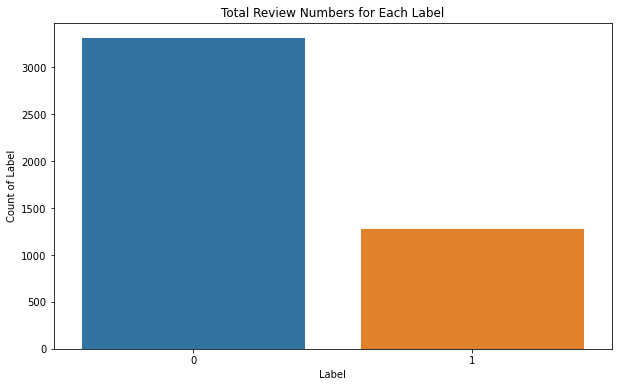

0    3312
1    1275
Name: label, dtype: int64

In [28]:
# bifurcation of labels

plt.figure(figsize = (10,6))
sns.countplot(data = att_train, x = 'label')
plt.title('Total Review Numbers for Each Label', color='black')
plt.xlabel('Label')
plt.ylabel('Count of Label')
plt.show()

# Customer totals for each rating class
att_train['label'].value_counts()

*As we can see from the above graph, there are 3312 negative reviews and 1275 positive reviews received by AT&T from the year 2015 to the year 2020.*

<Figure size 720x432 with 0 Axes>

label
0    3312
1    1275
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

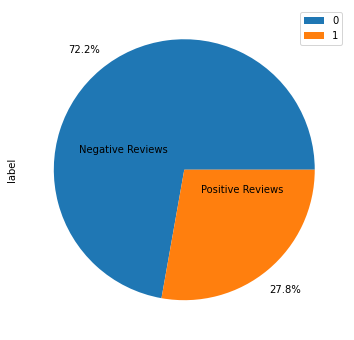

In [29]:
# bifuraction of label as percentage

plt.figure(figsize = (10,6))
att_train.groupby('label').label.count()
att_train.groupby('label').label.count().plot(kind='pie',autopct='%1.1f%%', pctdistance=1.2, labeldistance=0.2, labels=['Negative Reviews','Positive Reviews'])
plt.legend(loc=1, labels=att_train.index)
plt.show()

*From the above chart, we get to know that 72.2% negative reviews and 27.8% positive reviews have been received by AT&T.*

**Year wise Bifurcation of Positive and Negative Reviews**

In [30]:
# checking the count of type of reviews on a yearly basis

year_label = pd.DataFrame(att_train.groupby([att_train.Date.dt.year]).label.value_counts())
year_label

label
Date label       
2015 0        818
     1        252
2016 0        607
     1        187
2017 0        654
     1        335
2018 0        555
     1        232
2019 0        473
     1        164
2020 0        205
     1        105

*From the above table, we can analyse the number of positive and negative reviews received by AT&T in each year.*  
*In **2015**, AT&T got 818 negative reviews and 252 positove reviews*  
*In **2016**, AT&T got 607 negative reviews and 187 positive reviews*  
*In **2017**, AT&T got 654 negative reviews and 335 positive reviews*  
*In **2018**, AT&T got 555 negative reviews and 232 positive reviews*  
*In **2019**, AT&T got 473 negative reviews and 164 positive reviews*  
*In **2020**, AT&T got 205 negative reviews and 105 positive reviews*  
*In **2015** it received highest number of negative reviews and in **2020** it received lowest number of negative reviews*  
*In **2017** it received highest number of positive reviews and in **2020** it received lowest number of positive reviews*

**Year Wise Comparison of Rating and Label**

In [31]:
# grouping the year and label on the basis of rating

rating_label = pd.DataFrame(att_train.groupby([att_train.Date.dt.year, "label"]).Rating.value_counts())

In [32]:
# chceking the dataframe

rating_label

Rating
Date label Rating        
2015 0     1.0        769
           2.0         30
           5.0         11
           4.0          4
           0.0          3
...                   ...
2020 1     5.0         26
           4.0         14
           3.0          8
           2.0          4
           0.0          2

[68 rows x 1 columns]

In [33]:
# priting the dataframe

with pd.option_context('display.max_rows', 68, 'display.max_columns', 1):
    print(rating_label)

                   Rating
Date label Rating        
2015 0     1.0        769
           2.0         30
           5.0         11
           4.0          4
           0.0          3
           3.0          1
     1     1.0        227
           2.0         15
           5.0          5
           3.0          3
           0.0          2
2016 0     1.0        581
           3.0          7
           2.0          6
           4.0          6
           5.0          4
           0.0          3
     1     1.0        148
           5.0         14
           4.0          9
           2.0          7
           3.0          6
           0.0          3
2017 0     1.0        467
           3.0         80
           2.0         49
           4.0         31
           5.0         25
           0.0          2
     1     1.0        144
           4.0         73
           5.0         58
           3.0         35
           2.0         22
           0.0          3
2018 0     1.0        468
           3

**Feature Engineering for AT&T**

In [34]:
# creating data for tokenization

docs = att_train['Content']

In [35]:
# tokenzing the docs

sentences=[[token.strip(string.punctuation).strip() \
             for token in nltk.word_tokenize(doc.lower()) \
                 if token not in string.punctuation and \
                 len(token.strip(string.punctuation).strip())>=2]\
             for doc in docs]

In [36]:
# adding a column att_train['token_text'] in the dataset

att_train['token_text'] = sentences

In [37]:
# creating a dataframe

att_data = att_train[["token_text", "Rating"]].reset_index()

In [38]:
# checking if dataset is created

att_data.head()

,index,token_text,Rating
0,0,"[absolutely, the, worse, customer, service, ha...",1.0
1,1,"[do, n't, use, at, switched, from, t-mobile, t...",1.0
2,2,"[the, worst, wireless, company, ever, from, th...",1.0
3,3,"[we, have, family, plan, with, cell, phones, i...",1.0
4,4,"[at, is, scam, of, the, highest, magnitude, tu...",1.0


In [39]:
# creating stopwords list for analysis

stop_words = stopwords.words('english')
stop_words+=['VERIZON', 'verizon', "AT&T", "T-Mobile", 'I', 'AT', '&', 'T', "cell", "phone", "she", "they", "get", "could", "", "wa", "ha", '00', '000', '00pm', '01', '02', '03', '04', '05', '0500', '06', '07', '08', '09', '10', '100', '1000', '100mbps', '102', '104', '105', '106', '107', '108', '109', '10g', '10gb', '10pm', '10th', '10x', '11', '110', '1100', '111', '112', '113', '114', '115', '116', '117', '118', '119', '11am', '11th', '12', '120', '1200', '121', '122', '123', '125', '126', '127', '128', '128gb', '129', '12pm', '12th', '13', '130', '1300', '133', '134', '135', '136', '137', '138', '139', '13th', '14', '140', '1400', '142', '143', '144', '145', '146', '148', '149', '14th', '15', '150', '1500', '152', '153', '154', '155', '156', '158', '159', '15gb', '15th', '16', '160', '1600', '163', '165', '166', '167', '169', '16th', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '17th', '18', '180', '1800', '181', '183', '184', '185', '186', '187', '188', '189', '18mbps', '18th', '19', '190', '192', '193', '194', '196', '199', '1990', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1gb', '1mbps', '1pm', '1st', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '205', '207', '208', '209', '20g', '20gb', '20pm', '20th', '21', '210', '213', '214', '215', '216', '21st', '22', '220', '222', '223', '224', '225', '226', '227', '22nd', '23', '230', '2300', '233', '235', '23rd', '24', '240', '243', '24th', '25', '250', '2500', '255', '256', '257', '25th', '26', '260', '265', '267', '269', '26th', '27', '270', '275', '279', '27th', '28', '280', '285', '288', '28th', '29', '290', '296', '299', '29th', '2g', '2gb', '2k', '2nd', '2pm', '2x', '2yr', '30', '300', '3000', '30pm', '30th', '31', '310', '312', '315', '31st', '32', '320', '325', '32gb', '33', '330', '331', '335', '338', '34', '340', '343', '349', '35', '350', '351', '353', '36', '360', '365', '37', '38', '380', '386', '39', '390', '396', '399', '3g', '3gb', '3mbps', '3pm', '3rd', '3x', '40', '400', '40gb', '41', '42', '43', '430', '431', '44', '440', '449', '45', '450', '45pm', '46', '460', '47', '48', '480', '49', '499', '4g', '4gb', '4pm', '4s', '4th', '50', '500', '5000', '50gb', '51', '52', '53', '538', '54', '549', '55', '550', '56', '560', '57', '58', '580', '59', '590', '599', '5c', '5g', '5gb', '5pm', '5s', '5th', '60', '600', '61', '611', '62', '63', '630', '64', '649', '64gb', '65', '650', '66', '67', '68', '69', '695', '6gb', '6s', '6th', '70', '700', '71', '72', '73', '74', '75', '750', '76', '77', '78', '79', '799', '7pm', '7s', '7th', '80', '800', '807', '81', '82', '83', '84', '840', '85', '850', '855', '86', '866', '87', '877', '88', '888', '89', '8am', '8th', '90', '900', '91', '911', '92', '93', '94', '95', '96', '97', '98', '99', '9th', 'aaa', 'went', 'even']

In [40]:
# creating count vectorizer of bigrams

tf_vectorizer = CountVectorizer(min_df=3, stop_words=stop_words, ngram_range=(2, 2))
tf = tf_vectorizer.fit_transform(att_train['Content'])

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['mobile'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [41]:
# getting feature names

tf_feature_names = tf_vectorizer.get_feature_names()

In [42]:
# printing top 10 features

print(tf_feature_names[0:10])

['ability work', 'able access', 'able add', 'able answer', 'able anything', 'able assist', 'able call', 'able cancel', 'able change', 'able communicate']


In [43]:
# checking the shape of tf

print(tf.shape)

(4587, 21079)


In [44]:
# converting tf to array

tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
# adding a rating_type column

att_data = pd.DataFrame(tf.toarray(), columns=tf_feature_names)
att_data['rating_type'] = att_train['Rating']

In [46]:
# cross-checking the rating_type column

att_data['rating_type'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: rating_type, dtype: float64

In [47]:
# creating lists to form a dataframe summary

names_of_features = []
average_ratings = [] 
counts_of_ratings = []
for name in tf_feature_names:
    if name != 'rating_type':    
        avg_rating = att_data[att_data[name]== 1]['rating_type'].mean()
        rating_count = att_data[att_data[name]== 1]['rating_type'].count()
        names_of_features.append(name)
        average_ratings.append(avg_rating)
        counts_of_ratings.append(rating_count)  
    else:
        pass

In [48]:
# creating a new dataframe from names_of_features, average_ratings, and counts_of_ratings

att_fe = pd.DataFrame({'names_of_features':names_of_features, 'average_rating': average_ratings, 'counts_of_ratings': counts_of_ratings})

In [49]:
# checking the new dataframe

att_fe

,names_of_features,average_rating,counts_of_ratings
0,ability work,1.000000,3
1,able access,1.000000,7
2,able add,1.333333,6
3,able answer,1.000000,3
4,able anything,1.000000,4
...,...,...,...
21074,zero service,2.000000,3
21075,zero star,1.000000,5
21076,zero stars,1.000000,11
21077,zero would,1.000000,3


In [50]:
# analysing the top 21 good words through feature engineering

att_good = att_fe.query("counts_of_ratings == 5").sort_values(by='average_rating', ascending=False)[:21]
att_good.head(21)

,names_of_features,average_rating,counts_of_ratings
15672,service helpful,4.0,5
9802,love company,4.0,5
5810,easy use,3.8,5
13339,pleased service,3.6,5
6168,everywhere go,3.4,5
6178,excellent service,3.4,5
12773,people great,3.4,5
15904,service staff,3.2,5
15647,service fine,3.2,5
9390,like new,3.2,5


In [51]:
# creating dictionary of good words of AT&T

good_words_att = dict(zip(att_good['names_of_features'].tolist(), att_good['average_rating'].tolist()))
good_words_att

{'service helpful': 4.0,
 'love company': 4.0,
 'easy use': 3.8,
 'pleased service': 3.6,
 'everywhere go': 3.4,
 'excellent service': 3.4,
 'people great': 3.4,
 'service staff': 3.2,
 'service fine': 3.2,
 'like new': 3.2,
 'service plans': 3.2,
 'good experience': 3.2,
 'better prices': 3.2,
 'use landline': 3.0,
 'switch one': 3.0,
 'takes several': 2.8,
 'help matter': 2.8,
 'great deals': 2.8,
 'plan upgrade': 2.8,
 'getting better': 2.8,
 'service everywhere': 2.8}

<Figure size 720x720 with 0 Axes>

(-0.5, 499.5, 499.5, -0.5)

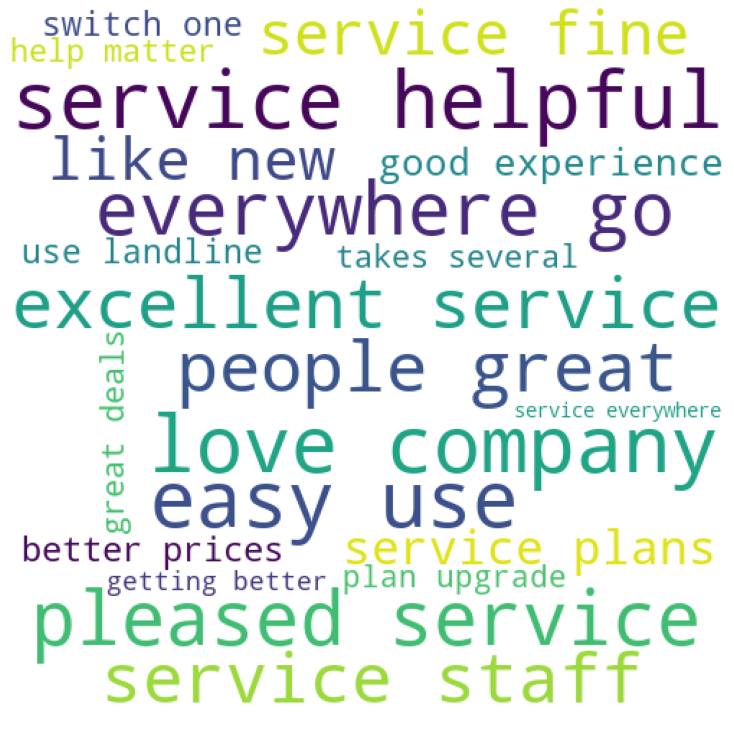

In [52]:
# creating word cloud to represent good features of AT&T

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 8).generate_from_frequencies(good_words_att)
 
# plot the WordCloud image                       
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**EDA OF VERIZON**

In [53]:
# loading our verizon training dataset

verizon_train = pd.read_csv("verizon.csv")
verizon_train.head()

,Date,Reviewer,Content,Rating
0,2020-11-03,Sonia of Lynn,This morning I had the pleasure of speaking wi...,5.0
1,2020-09-03,Amy of Jacksonville,I Live in Florida and was visiting in Georgia....,5.0
2,2020-08-12,Judy of Asheville,My husband and I were surprisingly pleased wit...,5.0
3,2020-08-12,Sarah of Lawndale,hours on the phone with Verizon and Asurion. B...,5.0
4,2020-11-29,Jody of Bentonville,Resolution response: Verizon finally came thr...,0.0


In [54]:
# checking the information about the dataset

verizon_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4445 entries, 0 to 4444
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4445 non-null   object 
 1   Reviewer  4445 non-null   object 
 2   Content   4445 non-null   object 
 3   Rating    4445 non-null   float64
dtypes: float64(1), object(3)
memory usage: 139.0+ KB


In [55]:
# since date is in object type, we shall convert it into datetime stamp

verizon_train['Date'] = pd.to_datetime(verizon_train['Date'], errors = 'coerce')

In [56]:
# rechecking the information about variable

verizon_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4445 entries, 0 to 4444
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4445 non-null   datetime64[ns]
 1   Reviewer  4445 non-null   object        
 2   Content   4445 non-null   object        
 3   Rating    4445 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 139.0+ KB


*The dataset consists of 4445 rows and 4 columns, namely Date, Reviewer, Content, Rating*

**Average Rating**

In [57]:
# describing the Rating column

verizon_train.describe()

,Rating
count,4445.000000
mean,1.712036
std,1.318651
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


*The data consists of total 4445 ratings. The avearge rating received by Verizon is 1.712036. The minimum rating is 0 which denotes that few reviewers have not rated Verizon and the maximum rating is 5.*

**Count of each Rating**

In [58]:
# Checking the count of each rating

verizon_train.Rating.value_counts()

1.0    3229
5.0     361
4.0     313
3.0     282
2.0     239
0.0      21
Name: Rating, dtype: int64

**Bifurcation of Ratings**

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='count'>

Text(0.5, 1.0, 'Total Review Numbers for Each Rating')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Number of Reviews')

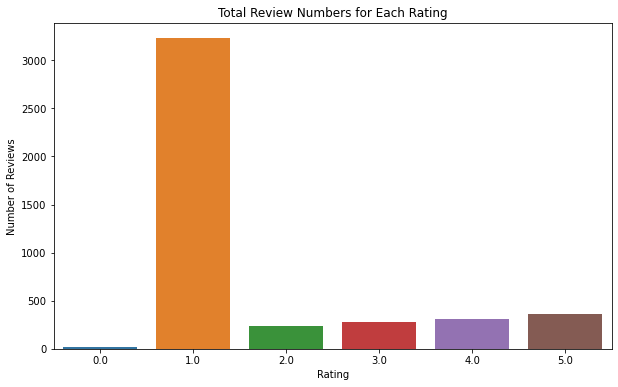

1.0    3229
5.0     361
4.0     313
3.0     282
2.0     239
0.0      21
Name: Rating, dtype: int64

In [59]:
# bifurcation of ratings

plt.figure(figsize = (10,6))
sns.countplot(data = verizon_train, x = 'Rating')
plt.title('Total Review Numbers for Each Rating', color='black')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
verizon_train['Rating'].value_counts()

*As we can see from the above table, 3229 has rated Verizon as 1, 239 has rated as 2, 282 has rated as 3, 313 has rated as 4, 361 has rated as 5, and 21 reviwers did not given any ratings*

<Figure size 720x432 with 0 Axes>

Rating
0.0      21
1.0    3229
2.0     239
3.0     282
4.0     313
5.0     361
Name: Rating, dtype: int64

<AxesSubplot:ylabel='Rating'>

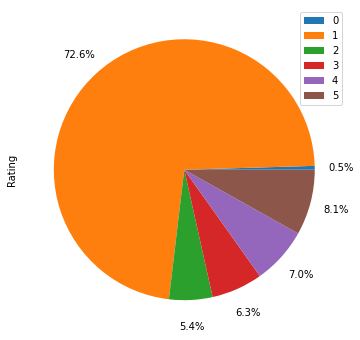

In [60]:
# bifuraction of rating as percentage

plt.figure(figsize = (10,6))
verizon_train.groupby('Rating').Rating.count()
verizon_train.groupby('Rating').Rating.count().plot(kind='pie',autopct='%1.1f%%', pctdistance=1.2, labeldistance=0.5, labels=['','','','','',''])
plt.legend(loc=1, labels=verizon_train.index)
plt.show()

*From the above chart we can see that 72.6% have rated Verizon as 1, 5.4% have rated it as 2, 6.3% have rated it as 3, 7% have rated it as 2, 8.1% have rated it as 5, and 0.5% did not give any ratings.*

**Year wise Rating Distribution**

In [61]:
# rating received by Verizon on a yearly basis

year_verizon_train = pd.DataFrame(verizon_train.groupby([verizon_train.Date.dt.year]).Rating.value_counts())
year_verizon_train

Rating
Date Rating        
2015 1.0        824
     2.0         50
     5.0         15
     0.0          6
     3.0          3
     4.0          2
2016 1.0        552
     2.0         20
     4.0         15
     3.0         14
     5.0         12
     0.0          8
2017 1.0        558
     4.0        184
     3.0        156
     5.0        152
     2.0         68
     0.0          1
2018 1.0        456
     3.0         77
     5.0         70
     4.0         66
     2.0         47
     0.0          1
2019 1.0        464
     5.0         34
     2.0         25
     3.0          6
     4.0          5
     0.0          3
2020 1.0        375
     5.0         78
     4.0         41
     2.0         29
     3.0         26
     0.0          2

*From the above table we can see the detailed bifurcation of rating in each year.*  
*In **2015**, 824 reviwers rated it as 1, 50 rated it as 2, 3 reviewers rated it as 3, 2 reviwers rated it as 4, 15 reviewers rated it as 5, and 6 did not gave any ratings.*  
*In **2016**, 552 reviwers rated it as 1, 20 rated it as 2, 14 reviewers rated it as 3, 15 reviwers rated it as 4, 12 reviewers rated it as 5, and 8 did not gave any ratings.*  
*In **2017**, 558 reviwers rated it as 1, 68 rated it as 2, 156 reviewers rated it as 3, 184 reviwers rated it as 4, 152 reviewers rated it as 5, and 1 did not gave any rating.*  
*In **2018**, 456 reviwers rated it as 1, 47 rated it as 2, 77 reviewers rated it as 3, 66 reviwers rated it as 4, 70 reviewers rated it as 5, and 1 did not gave any rating.*  
*In **2019**, 464 reviwers rated it as 1, 25 rated it as 2, 6 reviewers rated it as 3, 5 reviwers rated it as 4, 34 reviewers rated it as 5, and 3 did not gave any ratings.*  
*In **2020**, 375 reviwers rated it as 1, 29 rated it as 2, 26 reviewers rated it as 3, 41 reviwers rated it as 4, 78 reviewers rated it as 5, and 2 did not gave any ratings.*

**Calculating Length of Reviews on the Basis of Ratings**

In [62]:
# now we shall see the word count to calculate the length of each review on the basis of rating

word_count=[]
for word in verizon_train.Content:
    word_count.append(len(str(word).split()))

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='Rating'>

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Review Length')

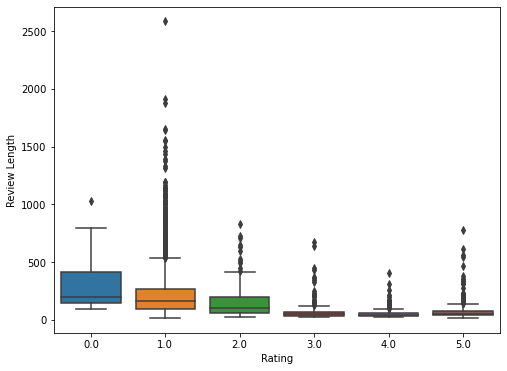

In [63]:
# calculating the length of review on the basis of rating

plt.figure(figsize = (8,6))
sns.boxplot(x='Rating',y=word_count,data=verizon_train)
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

*The above bar graph shows that there are outliers present. Hence, to better understand the review length we will plot the graph without outliers*

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='Rating'>

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Review Length')

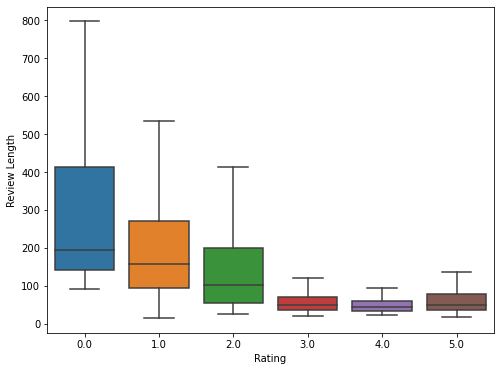

In [64]:
# since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers

plt.figure(figsize = (8,6))
sns.boxplot(x='Rating', y=word_count, data=verizon_train, showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

*As we can see from the above graph, for Verizon the largest review is written by reviewers who did not give any ratings consisting of length from approximately 150 to 410 word count, then the reviewers who rated Verizon as 1, have written the second largest reviews length wise and the review length ranges from 100 to approximately 270 word counts. The reviewers who have given rating 4 has written the shortest reviews.*

**Normalization, Tokenization, Collocation**

In [65]:
# define the function

def top_collocation(docs, K):
    
    # creating a list for result consisiting of phrases
    result = []
    
    # creating a list to append tokens
    token_list = []
    
    # tokenize each row
    doc = docs.apply(nltk.word_tokenize)
    for tokens in doc:
        for token in tokens:
            token_list.append(token)
    #print(tokenlist)
    
    # intialising lemmatization for normalization purpose
    lemmatizer = WordNetLemmatizer()
    
    # creating a list to append lematize tokens
    lemmatize_token = []
    
    # lemmatize each token in a row
    for token in token_list:
        lem_tok = lemmatizer.lemmatize(token)
        lemmatize_token.append(lem_tok)
    
    # stopwords and punctuations
    stop_words = stopwords.words('english')
    stop_words+=['VERIZON', 'verizon', 'Verizon', "AT&T", "new", "bill", "month", 'many', 'time', "next", "someone" ,"T-Mobile", 'I', 'AT', '&', 'T', "cell", "phone", "she", "they", "get", "could", "", "wa", "ha"]
    punctuations = string.punctuation+'—'+'’'+'”'+'“'+"''"
    
    # removing stopwords and punctuations
    tokens = [ token.lower() for token in lemmatize_token if token not in stop_words and token not in punctuations]
    
    # removing the empty space
    tokens = [token.strip() for token in tokens if token.strip()!='']
    
    # providing part of speech tagging to tokens
    tagged_tokens= nltk.pos_tag(tokens)
    
    # creating bigrams
    bigrams=list(nltk.bigrams(tagged_tokens))
    
    # creating word distribution frequency of bigrams
    word_dist=nltk.FreqDist(bigrams)
    
    # phrases of JJ-NN(adjective noun) and NN-NN(noun noun) combination
    phrases=[(x[0],y[0]) for (x,y) in bigrams if x[1].startswith('JJ') or x[1].startswith('NN') and y[1].startswith('NN')]
    
    # creating word distribution frequency of phrases
    phrases_dist=nltk.FreqDist(phrases)
    
    # most common phrases
    result = phrases_dist.most_common(K)
    
    # returns the most frequent collocation
    return result

In [66]:
# checking top 100 collocation

top_collocation(verizon_train['Content'],100)

[(('customer', 'service'), 2268),
 (('data', 'plan'), 220),
 (('unlimited', 'data'), 161),
 (('credit', 'card'), 152),
 (('service', 'rep'), 144),
 (('tech', 'support'), 142),
 (('termination', 'fee'), 141),
 (('early', 'termination'), 136),
 (('loyal', 'customer'), 133),
 (('local', 'store'), 129),
 (('year', 'contract'), 123),
 (('billing', 'cycle'), 119),
 (('sim', 'card'), 118),
 (('unlimited', 'plan'), 110),
 (('sale', 'rep'), 104),
 (('text', 'message'), 103),
 (('call', 'customer'), 100),
 (('activation', 'fee'), 99),
 (('data', 'usage'), 84),
 (('customer', 'support'), 82),
 (('customer', 'care'), 81),
 (('collection', 'agency'), 80),
 (('gift', 'card'), 79),
 (('speak', 'supervisor'), 75),
 (('corporate', 'store'), 73),
 (('samsung', 'galaxy'), 73),
 (('credit', 'account'), 70),
 (('technical', 'support'), 70),
 (('best', 'buy'), 67),
 (('cancel', 'service'), 66),
 (('full', 'price'), 65),
 (('wireless', 'service'), 65),
 (('good', 'service'), 64),
 (('monthly', 'payment'), 64

*The top 100 collocations shows us the different aspects side of Verizon*

**Naive Based Sentiment Analysis**

In [67]:
# adding a column tokenized_row in the verizon_train dataframe which contains list of tokens

verizon_train['tokenized_row'] = verizon_train['Content'].apply(nltk.word_tokenize)

In [68]:
# rechecking verizon_train['tokenized_row'] is added in teh dataframe

verizon_train.head()

,Date,Reviewer,Content,Rating,tokenized_row
0,2020-11-03,Sonia of Lynn,This morning I had the pleasure of speaking wi...,5.0,"[This, morning, I, had, the, pleasure, of, spe..."
1,2020-09-03,Amy of Jacksonville,I Live in Florida and was visiting in Georgia....,5.0,"[I, Live, in, Florida, and, was, visiting, in,..."
2,2020-08-12,Judy of Asheville,My husband and I were surprisingly pleased wit...,5.0,"[My, husband, and, I, were, surprisingly, plea..."
3,2020-08-12,Sarah of Lawndale,hours on the phone with Verizon and Asurion. B...,5.0,"[hours, on, the, phone, with, Verizon, and, As..."
4,2020-11-29,Jody of Bentonville,Resolution response: Verizon finally came thr...,0.0,"[Resolution, response, :, Verizon, finally, ca..."


In [69]:
# finding the positive words for each review

with open("positive-words.txt",'r') as f:
    positive_words=[line.strip() for line in f]

negations=['not', 'too', 'n\'t', 'no', 'cannot', 'neither','nor', 'little', 'few']

positive_token_list = []

for token in verizon_train['tokenized_row']:
    positive_tokens=[]
    for idx, tok in enumerate(token):
        if tok in positive_words:
            if idx > 0:
                if token[idx-1] not in negations:
                    positive_tokens.append(tok)
            else:
                positive_tokens.append(tok)
    positive_token_list.append(positive_tokens)
    
print(positive_token_list)

[['pleasure', 'helpful', 'pleasant', 'knowledgeable', 'enjoyable'], ['peach', 'good', 'helpful', 'helpful', 'affordable', 'wonderful', 'happy'], ['pleased', 'recommendation', 'nice', 'patient'], ['won', 'dedicated', 'honesty', 'best', 'bless'], ['promised', 'agreeable', 'kudos', 'promised', 'promised', 'promised'], ['entertain', 'available'], ['reliable', 'patient', 'patient', 'reliable', 'reliable', 'excellent', 'valuable'], ['worked', 'refund', 'work'], ['protection', 'like'], ['recommend'], ['like'], ['excellent'], ['right', 'willing'], ['support'], ['available', 'incredibly'], [], ['work', 'passion'], ['refund', 'refund', 'refund', 'refund'], ['honor', 'good', 'phenomenal'], [], ['improving', 'fair', 'fair'], ['available', 'best', 'cheaper', 'promised'], [], ['better', 'excellent', 'well', 'better'], ['good', 'outstanding', 'free', 'benefits', 'great', 'grace', 'richer'], ['faithful', 'honest', 'super', 'right', 'better', 'honest', 'work'], [], ['upgraded', 'available', 'good', 'lo

In [70]:
# checking the length of positive_token_list

len(positive_token_list)

4445

In [71]:
# adding a column in verizon_train dataframe

verizon_train['positive_token'] = positive_token_list

In [72]:
# finding the negative words for each review

with open("negative-words.txt",'r') as f:
    negative_words=[line.strip() for line in f]
    
negative_token_list =[]

for token in verizon_train['tokenized_row']:
    negative_tokens=[]
    for tok in token:
        if tok in negative_words:
            negative_tokens.append(tok)
    negative_token_list.append(negative_tokens)
    
print(negative_token_list)

[['unhappy', 'frustrations', 'fall'], ['hate'], ['disappointed'], ['bad'], ['worst'], ['worst', 'screwed'], ['abruptly', 'dying', 'cancer', 'mistake', 'poorest', 'issues', 'poor', 'lack', 'hardship'], ['worst', 'issue', 'trouble', 'issues', 'worst'], ['lost', 'lost', 'stolen', 'damaged', 'misleading'], ['scratched', 'worthless', 'issues', 'poor'], ['worse', 'worse', 'worse', 'broken'], ['mistake'], ['problem', 'frustrating'], ['lie', 'broken', 'rude', 'lie', 'bad', 'hate'], ['trouble', 'vain', 'frustrated', 'issue', 'scratch', 'messing', 'messed', 'terrible', 'mess'], ['bad', 'rude', 'refused', 'beware'], ['refused', 'refused', 'problem', 'refused', 'livid', 'problem', 'hate'], ['failed', 'error', 'refused', 'dumb', 'impossible'], ['negative', 'sucks'], [], [], ['failed', 'issue', 'issue', 'problem', 'problem', 'worst', 'expensive'], ['rude', 'vindictive'], ['expensive', 'hard', 'sucks', 'frustrated', 'stinks', 'abysmal', 'lose'], ['beware', 'expensive', 'wrong', 'mistake', 'wrong', 'w

In [73]:
# checking the length of negative_token_list

len(negative_token_list)

4445

In [74]:
# adding a column in verizon_train dataframe

verizon_train['negative_token'] = negative_token_list

In [75]:
# checking if two columns are added

verizon_train.head()

,Date,Reviewer,Content,Rating,tokenized_row,positive_token,negative_token
0,2020-11-03,Sonia of Lynn,This morning I had the pleasure of speaking wi...,5.0,"[This, morning, I, had, the, pleasure, of, spe...","[pleasure, helpful, pleasant, knowledgeable, e...","[unhappy, frustrations, fall]"
1,2020-09-03,Amy of Jacksonville,I Live in Florida and was visiting in Georgia....,5.0,"[I, Live, in, Florida, and, was, visiting, in,...","[peach, good, helpful, helpful, affordable, wo...",[hate]
2,2020-08-12,Judy of Asheville,My husband and I were surprisingly pleased wit...,5.0,"[My, husband, and, I, were, surprisingly, plea...","[pleased, recommendation, nice, patient]",[disappointed]
3,2020-08-12,Sarah of Lawndale,hours on the phone with Verizon and Asurion. B...,5.0,"[hours, on, the, phone, with, Verizon, and, As...","[won, dedicated, honesty, best, bless]",[bad]
4,2020-11-29,Jody of Bentonville,Resolution response: Verizon finally came thr...,0.0,"[Resolution, response, :, Verizon, finally, ca...","[promised, agreeable, kudos, promised, promise...",[worst]


In [76]:
# comparing the number of positive and negative words present in a review and labelling on the basis of count

verizon_train['label'] = verizon_train.apply(lambda x : 1 if len(x['positive_token']) > len(x['negative_token']) else 0, axis=1)

In [77]:
# checking if the column label is added

verizon_train.head()

,Date,Reviewer,Content,Rating,tokenized_row,positive_token,negative_token,label
0,2020-11-03,Sonia of Lynn,This morning I had the pleasure of speaking wi...,5.0,"[This, morning, I, had, the, pleasure, of, spe...","[pleasure, helpful, pleasant, knowledgeable, e...","[unhappy, frustrations, fall]",1
1,2020-09-03,Amy of Jacksonville,I Live in Florida and was visiting in Georgia....,5.0,"[I, Live, in, Florida, and, was, visiting, in,...","[peach, good, helpful, helpful, affordable, wo...",[hate],1
2,2020-08-12,Judy of Asheville,My husband and I were surprisingly pleased wit...,5.0,"[My, husband, and, I, were, surprisingly, plea...","[pleased, recommendation, nice, patient]",[disappointed],1
3,2020-08-12,Sarah of Lawndale,hours on the phone with Verizon and Asurion. B...,5.0,"[hours, on, the, phone, with, Verizon, and, As...","[won, dedicated, honesty, best, bless]",[bad],1
4,2020-11-29,Jody of Bentonville,Resolution response: Verizon finally came thr...,0.0,"[Resolution, response, :, Verizon, finally, ca...","[promised, agreeable, kudos, promised, promise...",[worst],1


In [78]:
# counting the number of positive and negative reviews

verizon_train.label.value_counts()

0    2965
1    1480
Name: label, dtype: int64

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='label', ylabel='count'>

Text(0.5, 1.0, 'Total Review Numbers for Each Label')

Text(0.5, 0, 'Label')

Text(0, 0.5, 'Count of Label')

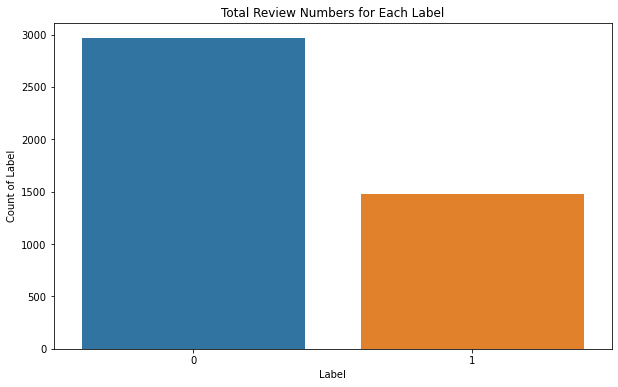

0    2965
1    1480
Name: label, dtype: int64

In [79]:
# bifurcation of labels

plt.figure(figsize = (10,6))
sns.countplot(data = verizon_train, x = 'label')
plt.title('Total Review Numbers for Each Label', color='black')
plt.xlabel('Label')
plt.ylabel('Count of Label')
plt.show()

# Customer totals for each rating class
verizon_train['label'].value_counts()

*As we can see from the above graph, there are 2965 negative reviews and 1480 positive reviews received by Verizon from the year 2015 to the year 2020.*

<Figure size 720x432 with 0 Axes>

label
0    2965
1    1480
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

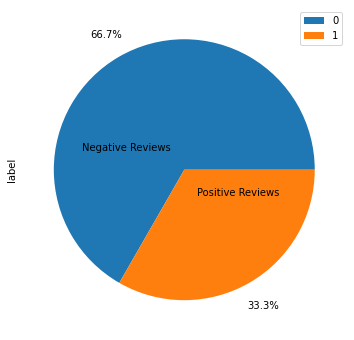

In [80]:
# bifuraction of label as percentage

plt.figure(figsize = (10,6))
verizon_train.groupby('label').label.count()
verizon_train.groupby('label').label.count().plot(kind='pie',autopct='%1.1f%%', pctdistance=1.2, labeldistance=0.2, labels=['Negative Reviews','Positive Reviews'])
plt.legend(loc=1, labels=verizon_train.index)
plt.show()

*From the above chart, we get to know that 66.7% negative reviews and 33.3% positive reviews have been received by Verizon.*

**Year wise Bifurcation of Positive and Negative Reviews**

In [81]:
# checking the count type of reviews on a yearly basis

year_label = pd.DataFrame(verizon_train.groupby([verizon_train.Date.dt.year]).label.value_counts())
year_label

label
Date label       
2015 0        656
     1        244
2016 0        443
     1        178
2017 0        668
     1        451
2018 0        465
     1        252
2019 0        384
     1        153
2020 0        349
     1        202

*From the above table, we can analyse the number of positive and negative reviews received by Verizon in each year.*  
*In **2015**, Verizon got 656 negative reviews and 244 positove reviews*  
*In **2016**, Verizon got 443 negative reviews and 178 positive reviews*  
*In **2017**, Verizon got 668 negative reviews and 451 positive reviews*  
*In **2018**, Verizon got 465 negative reviews and 252 positive reviews*  
*In **2019**, Verizon got 384 negative reviews and 153 positive reviews*  
*In **2020**, Verizon got 349 negative reviews and 202 positive reviews*  
*In **2017** it received highest number of negative reviews and in **2020** it received lowest number of negative reviews*  
*In **2017** it received highest number of positive reviews and in **2019** it received lowest number of positive reviews*

**Year Wise Comparison of Rating and Label**

In [82]:
# grouping the year and label on the basis of rating

rating_label = pd.DataFrame(verizon_train.groupby([verizon_train.Date.dt.year, "label"]).Rating.value_counts())

In [83]:
# chceking the dataframe

rating_label

Rating
Date label Rating        
2015 0     1.0        618
           2.0         29
           0.0          5
           5.0          3
           3.0          1
...                   ...
2020 1     5.0         61
           4.0         30
           3.0         12
           2.0          6
           0.0          1

[69 rows x 1 columns]

In [84]:
# priting the dataframe

with pd.option_context('display.max_rows', 69, 'display.max_columns', 1):
    print(rating_label)

                   Rating
Date label Rating        
2015 0     1.0        618
           2.0         29
           0.0          5
           5.0          3
           3.0          1
     1     1.0        206
           2.0         21
           5.0         12
           3.0          2
           4.0          2
           0.0          1
2016 0     1.0        415
           2.0         12
           3.0          6
           0.0          5
           5.0          4
           4.0          1
     1     1.0        137
           4.0         14
           2.0          8
           3.0          8
           5.0          8
           0.0          3
2017 0     1.0        418
           3.0         82
           4.0         73
           5.0         51
           2.0         43
           0.0          1
     1     1.0        140
           4.0        111
           5.0        101
           3.0         74
           2.0         25
2018 0     1.0        354
           3.0         42
           2

**Feature Engineering for Verizon**

In [85]:
# creating data for tokenization

docs = verizon_train['Content']

In [86]:
# tokenzing the docs

sentences=[[token.strip(string.punctuation).strip() \
             for token in nltk.word_tokenize(doc.lower()) \
                 if token not in string.punctuation and \
                 len(token.strip(string.punctuation).strip())>=2]\
             for doc in docs]

In [87]:
# adding a column verizon_train['token_text'] in the dataset

verizon_train['token_text'] = sentences

In [88]:
# creating a dataframe

verizon_data = verizon_train[["token_text", "Rating"]].reset_index()

In [89]:
# checking if dataset is created

verizon_data.head()

,index,token_text,Rating
0,0,"[this, morning, had, the, pleasure, of, speaki...",5.0
1,1,"[live, in, florida, and, was, visiting, in, ge...",5.0
2,2,"[my, husband, and, were, surprisingly, pleased...",5.0
3,3,"[hours, on, the, phone, with, verizon, and, as...",5.0
4,4,"[resolution, response, verizon, finally, came,...",0.0


In [90]:
# creating stopwords list for analysis

stop_words = stopwords.words('english')
stop_words+=['VERIZON', 'verizon', "AT&T", "T-Mobile", 'I', 'AT', '&', 'T', "cell", "phone", "she", "they", "get", "could", "", "wa", "ha", '00', '000', '01', '02', '0204', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '101', '104', '105', '108', '109', '10g', '10gb', '10th', '10x', '11', '110', '1100', '113', '115', '116', '117', '12', '120', '1200', '122', '124', '125', '128', '128gb', '129', '12gb', '12th', '13', '130', '1300', '133', '135', '138', '13th', '14', '140', '1400', '142', '145', '146', '149', '14th', '15', '150', '1500', '152', '153', '155', '156', '159', '15gb', '15th', '16', '160', '1600', '165', '168', '169', '16gb', '16th', '17', '170', '1700', '175', '178', '179', '17th', '18', '180', '1800', '181', '184', '185', '186', '187', '18th', '19', '190', '1900', '195', '197', '199', '1990', '1994', '1996', '1997', '1998', '1999', '19th', '1g', '1gb', '1k', '1st', '1x', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '205', '20gb', '20th', '21', '210', '212', '213', '216', '21st', '22', '220', '2200', '221', '225', '227', '22gb', '22nd', '23', '230', '232', '235', '23rd', '24', '240', '2400', '242', '244', '245', '249', '24th', '25', '250', '254', '256', '257', '25gb', '25th', '26', '260', '264', '26th', '27', '270', '275', '278', '279', '27th', '28', '280', '284', '285', '28th', '29', '290', '299', '29th', '2g', '2gb', '2nd', '2x', '2yr', '30', '300', '3000', '30gb', '30th', '31', '310', '31st', '32', '320', '325', '327', '32gb', '33', '330', '333', '34', '340', '35', '350', '3500', '36', '360', '365', '37', '38', '380', '384', '39', '399', '3g', '3gb', '3pm', '3rd', '3x', '40', '400', '41', '412', '42', '420', '43', '435', '436', '44', '440', '442', '45', '450', '46', '460', '47', '475', '48', '480', '49', '4g', '4gb', '4glte', '4s', '4th', '4x', '50', '500', '51', '510', '515', '52', '53', '530', '54', '540', '549', '55', '550', '56', '560', '57', '575', '58', '580', '586', '59', '5c', '5g', '5gb', '5pm', '5s', '5th', '60', '600', '61', '611', '616', '62', '630', '64', '649', '64gb', '65', '650', '66', '67', '672', '68', '69', '699', '6gb', '6s', '6th', '70', '700', '71', '72', '73', '74', '75', '750', '76', '77', '78', '79', '7plus', '7s', '7th', '80', '800', '82', '83', '830', '84', '844', '85', '850', '86', '866', '868', '87', '88', '880', '888', '89', '8am', '8gb', '8pm', '8th', '90', '900', '91', '911', '922', '93', '94', '95', '96', '960', '97', '98', '99', '9th']

In [91]:
# creating count vectorizer of bigrams

tf_vectorizer = CountVectorizer(min_df=3, stop_words=stop_words, ngram_range=(2, 2))
tf = tf_vectorizer.fit_transform(verizon_train['Content'])

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['mobile'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [92]:
# getting feature names

tf_feature_names = tf_vectorizer.get_feature_names()

In [93]:
# printing top 10 features

print(tf_feature_names[0:10])

['ability use', 'able access', 'able afford', 'able answer', 'able anything', 'able assist', 'able away', 'able call', 'able cancel', 'able charge']


In [94]:
# checking the shape of tf

print(tf.shape)

(4445, 18337)


In [95]:
# converting tf to array

tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [96]:
# adding a rating_type column

verizon_data = pd.DataFrame(tf.toarray(), columns=tf_feature_names)
verizon_data['rating_type'] = verizon_train['Rating']

In [97]:
# cross-checking the rating_type column

verizon_data['rating_type'].head()

0    5.0
1    5.0
2    5.0
3    5.0
4    0.0
Name: rating_type, dtype: float64

In [98]:
# creating lists to form a dataframe summary

names_of_features = []
average_ratings = [] 
counts_of_ratings = []
for name in tf_feature_names:
    if name != 'rating_type':    
        avg_rating = verizon_data[verizon_data[name]== 1]['rating_type'].mean()
        rating_count = verizon_data[verizon_data[name]== 1]['rating_type'].count()
        names_of_features.append(name)
        average_ratings.append(avg_rating)
        counts_of_ratings.append(rating_count)  
    else:
        pass

In [99]:
# creating a new dataframe from names_of_features, average_ratings, and counts_of_ratings

verizon_fe = pd.DataFrame({'names_of_features':names_of_features, 'average_rating': average_ratings, 'counts_of_ratings': counts_of_ratings})

In [100]:
# checking the new dataframe

verizon_fe

,names_of_features,average_rating,counts_of_ratings
0,ability use,1.400000,5
1,able access,1.250000,8
2,able afford,1.000000,3
3,able answer,1.666667,3
4,able anything,1.000000,3
...,...,...,...
18332,zero problems,1.000000,2
18333,zero resolution,1.000000,3
18334,zero star,1.000000,3
18335,zero stars,1.000000,9


In [101]:
# analysing the top 30 good words through feature engineering

verizon_good = verizon_fe.query("counts_of_ratings == 4").sort_values(by='average_rating', ascending=False)[:30]
verizon_good.head(30)

,names_of_features,average_rating,counts_of_ratings
5267,extra mile,5.00,4
6670,helpful call,4.75,4
595,always friendly,4.75,4
11339,pleased service,4.75,4
612,always reliable,4.50,4
12065,reception area,4.50,4
12070,reception great,4.50,4
627,always works,4.50,4
13080,selection phones,4.25,4
11827,rarely dropped,4.25,4


In [102]:
# creating dictionary of good words of Verizon

good_words_verizon = dict(zip(verizon_good['names_of_features'].tolist(), verizon_good['average_rating'].tolist()))
good_words_verizon

{'extra mile': 5.0,
 'helpful call': 4.75,
 'always friendly': 4.75,
 'pleased service': 4.75,
 'always reliable': 4.5,
 'reception area': 4.5,
 'reception great': 4.5,
 'always works': 4.5,
 'selection phones': 4.25,
 'rarely dropped': 4.25,
 'good selection': 4.25,
 'area coverage': 4.25,
 'great plan': 4.25,
 'provides good': 4.0,
 'overall happy': 4.0,
 'meets needs': 4.0,
 'service reliable': 4.0,
 'best one': 4.0,
 'years tried': 4.0,
 'plan fit': 3.75,
 'quite good': 3.75,
 'thought switching': 3.75,
 'signal everywhere': 3.75,
 'plan seniors': 3.75,
 'fit budget': 3.75,
 'absolutely love': 3.75,
 'went unlimited': 3.75,
 'network reliable': 3.75,
 'comparison carriers': 3.75,
 'great experience': 3.75}

<Figure size 720x720 with 0 Axes>

(-0.5, 499.5, 499.5, -0.5)

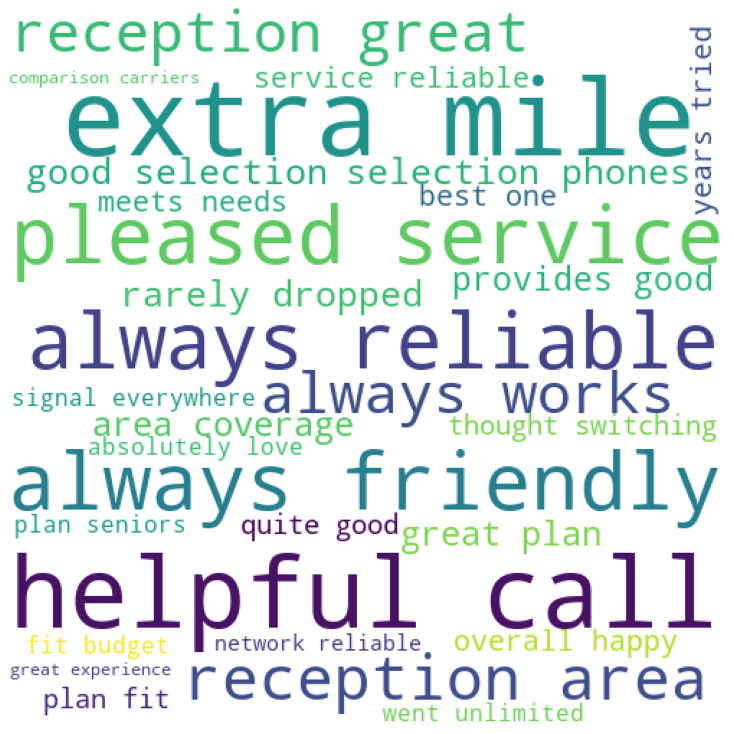

In [103]:
# creating word cloud to represent good features of Verizon

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 8).generate_from_frequencies(good_words_verizon)
 
# plot the WordCloud image                       
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()